In [1]:
import seaborn as sns
cars = sns.load_dataset("mpg")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


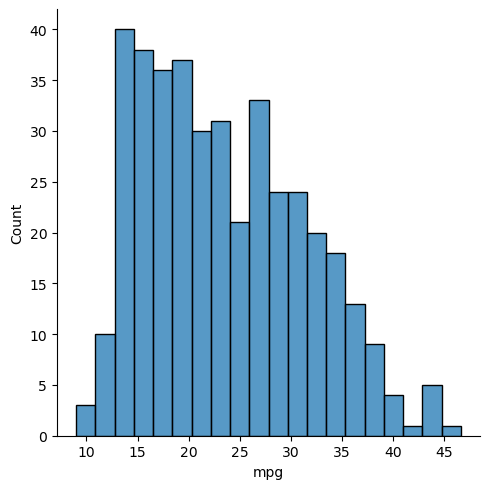

In [2]:
sns.displot(data=cars, x="mpg", bins=20);

In [3]:
x = cars["mpg"]
x < 20

0       True
1       True
2       True
3       True
4       True
       ...  
393    False
394    False
395    False
396    False
397    False
Name: mpg, Length: 398, dtype: bool

In [5]:
(x < 20).mean()

0.3793969849246231

In [6]:
cars["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [7]:
u = x.loc[cars["origin"] == "usa"]
len(u)

249

In [8]:
(u < 20).mean()

0.570281124497992